# Laboratorio #3

### 1. ¿Cuál es el tamaño en bytes de un array de 1000 elementos de tipo booleano?

In [10]:
import numpy as np
tamaño_booleano = np.array([False]*1000).nbytes
print("Tamaño en bytes de un array de 1000 elementos booleanos:", tamaño_booleano)



Tamaño en bytes de un array de 1000 elementos booleanos: 1000


### 2. Cree un array cuyos elementos sean los enteros pares en [1,100] y en orden decreciente. Muestre los 10 últimos por pantalla.

In [11]:
array_pares = np.array([i for i in range(100, 0, -2)])
print("Los últimos 10 elementos del array de pares en orden decreciente:", array_pares[-10:])


Los últimos 10 elementos del array de pares en orden decreciente: [20 18 16 14 12 10  8  6  4  2]


### 3. Dado el array
2 4 5 6

0 3 7 4

8 8 5 2

1 5 6 1

Seleccione con una instrucción el subarray de elementos

0 3 7 4

Después, seleccione el subarray de elementos

2 5

8 5

In [12]:
array = np.array([
    [2, 4, 5, 6],
    [0, 3, 7, 4],
    [8, 8, 5, 2],
    [1, 5, 6, 1]
])

subarray_1 = array[1]
subarray_2 = array[[1, 2], [0, 2]]
print("Subarray 0 3 7 4:", subarray_1)
print("Subarray 2 5 y 8 5:", subarray_2)


Subarray 0 3 7 4: [0 3 7 4]
Subarray 2 5 y 8 5: [0 5]


### 4. Dados los arrays a = [1, 4, 2, 7] y b = [1, 3, 2, 9], obtenga la media aritmética de la diferencia (a-b).

In [14]:
a = np.array([1, 4, 2, 7])
b = np.array([1, 3, 2, 9])
media_diferencia = np.mean(a - b)
print("Media aritmética de la diferencia (a - b):", media_diferencia)


Media aritmética de la diferencia (a - b): -0.25


### 5. Tengo valores de cordenadas (x, y) en las columnas
del array

1.33 4.5

30.0 10.7

70.2 0.5

Agregue a este array las coordenadas (37.1, -3.6).

Muestre en pantalla las dimensiones del nuevo array.

In [16]:
coordenadas = np.array([
    [1.33, 4.5],
    [30.0, 10.7],
    [70.2, 0.5]
])
nuevas_coordenadas = np.array([[37.1, -3.6]])
nuevo_array = np.concatenate((coordenadas, nuevas_coordenadas), axis=0)
print("Dimensiones del nuevo array:", nuevo_array.shape)

Dimensiones del nuevo array: (4, 2)


### 6. Copie el array del ejercicio anterior. Traspóngalo (. Agregue ahora dos nuevos pares de coordenadas: (10.8, 3.0) y (35.8, 12.0).

In [19]:
nuevo_array_transpuesto = nuevo_array.T
nuevas_coordenadas_transpuestas = np.array([[10.8, 35.8], [3.0, 12.0]])
nuevo_array_transpuesto = np.concatenate((nuevo_array_transpuesto, nuevas_coordenadas_transpuestas), axis=1)
print("Nuevo array transpuesto con las nuevas coordenadas:\n", nuevo_array_transpuesto)

Nuevo array transpuesto con las nuevas coordenadas:
 [[ 1.33 30.   70.2  37.1  10.8  35.8 ]
 [ 4.5  10.7   0.5  -3.6   3.   12.  ]]


# Parte 2: Exploración y Mineria de Datos

Con el dataset nucleospoblacion.csv adjunto al laboratorio, luego responda las siguientes preguntas usando pandas y matplotlib.

In [15]:
import pandas as pd

# Cargar el conjunto de datos en un DataFrame
df = pd.read_csv('nucleospoblacion.csv')
df.head()

,FID,OBJECTID,Texto,Poblacion,CodMun,Municipio,CodProvin,Provincia,X,Y
0,0,1,Agüimes,29431.0,35002,Agüimes,35,Las Palmas,-15.446012,27.900542
1,1,2,Antigua,10458.0,35003,Antigua,35,Las Palmas,-14.013301,28.418966
2,2,3,Arrecife,58156.0,35004,Arrecife,35,Las Palmas,-13.551451,28.960649
3,3,4,Arucas,36745.0,35006,Arucas,35,Las Palmas,-15.521512,28.117496
4,4,5,Gáldar,24473.0,35009,Gáldar,35,Las Palmas,-15.654111,28.143873


In [16]:
df.columns

Index(['FID', 'OBJECTID', 'Texto', 'Poblacion', 'CodMun', 'Municipio',
       'CodProvin', 'Provincia', 'X', 'Y'],
      dtype='object')

In [17]:
df.dtypes

FID            int64
OBJECTID       int64
Texto         object
Poblacion    float64
CodMun         int64
Municipio     object
CodProvin      int64
Provincia     object
X            float64
Y            float64
dtype: object

### 1. ¿Cuántos Municipios tienen más de 100000 habitantes?.

In [23]:
# Filtrar el DataFrame para incluir solo municipios con más de 100,000 habitantes
municipios_mas_100k = df[df['Poblacion'] > 100000]

municipios_mas_100k
# Contar el número de municipios resultantes
num_municipios_mas_100k = municipios_mas_100k['Municipio'].nunique()

# Imprimir el resultado
print("Número de municipios con más de 100,000 habitantes:", num_municipios_mas_100k)


Número de municipios con más de 100,000 habitantes: 62


### 2. Realice una gráfica de barras sobre la población de cada ciudad, ordenela de menor a mayo y responda:

a. ¿Cuál es la segunda ciudad más poblada?
b. ¿Qué posición ocupa Granada en el ranking de las ciudades más pobladas?

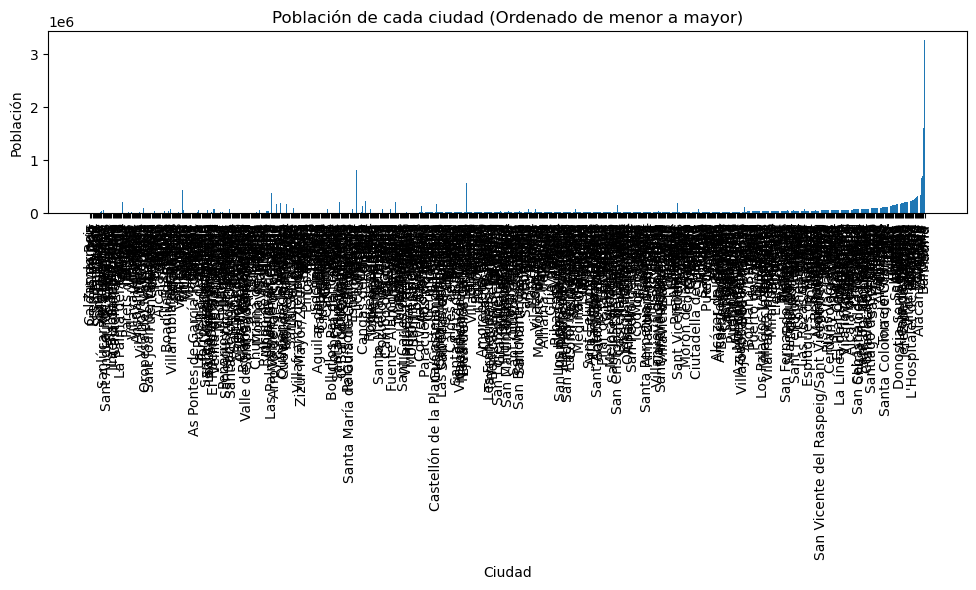

a. La segunda ciudad más poblada es: Barcelona
b. Granada ocupa la posición 273 en el ranking de las ciudades más pobladas.


In [32]:
import matplotlib.pyplot as plt

# Ordenar el DataFrame por población de manera ascendente
df_sorted = df.sort_values(by='Poblacion')

# Crear la gráfica de barras
plt.figure(figsize=(10, 6))
plt.bar(df_sorted['Municipio'], df_sorted['Poblacion'])
plt.xlabel('Ciudad')
plt.ylabel('Población')
plt.title('Población de cada ciudad (Ordenado de menor a mayor)')
plt.xticks(rotation=90)  # Rotar las etiquetas del eje x para mejor legibilidad
plt.tight_layout()
plt.show()

# Responder las preguntas
# a. ¿Cuál es la segunda ciudad más poblada?
segunda_ciudad = df_sorted.iloc[-2]['Municipio']
print("a. La segunda ciudad más poblada es:", segunda_ciudad)

# b. ¿Qué posición ocupa Granada en el ranking de las ciudades más pobladas?
posicion_granada = df_sorted[df_sorted['Municipio'] == 'Granada'].index[0] + 1
print("b. Granada ocupa la posición", posicion_granada, "en el ranking de las ciudades más pobladas.")


### 3. ¿Cuántos municipios de Extremadura tienen más de 5000 habitantes?

In [37]:
#Extremadura es de España
# Contar el número de municipios de Extremadura con más de 5000 habitantes
num_municipios_mas_5000 = len(df[((df['Provincia'] == 'Badajoz') | 
        (df['Provincia'] == 'Cáceres')) &
       (df['Poblacion'] > 5000)
  ])

#Imprimir el resultado
print("Número de municipios de Extremadura con más de 5000 habitantes:", num_municipios_mas_5000)


Número de municipios de Extremadura con más de 5000 habitantes: 14


### 4. ¿Cuál es el municipio situado más al Norte? (Usar el valor de la coordenada "Y" que representa la latitud en grados). Proporcione también la provincia a la que pertenece y su población.

In [38]:
# Encontrar el municipio situado más al Norte
municipio_mas_norte = df[df['Y'] == df['Y'].max()]

# Obtener el nombre del municipio, provincia y población
nombre_municipio = municipio_mas_norte['Municipio'].values[0]
provincia_municipio = municipio_mas_norte['Provincia'].values[0]
poblacion_municipio = municipio_mas_norte['Poblacion'].values[0]

# Imprimir la información
print("El municipio situado más al Norte es:", nombre_municipio)
print("Provincia:", provincia_municipio)
print("Población:", poblacion_municipio)


El municipio situado más al Norte es: Viveiro
Provincia: Lugo
Población: 16211.0


### 5.Obtenga la media, mediana, desviación estándar, valor máximo y valor mínimo de la población de los municipios de la provincia de Granada.

In [42]:
# Filtrar el DataFrame para incluir solo los municipios de la provincia de Granada
municipios_granada = df[df['Provincia'] == 'Granada']

# Calcular la media, mediana, desviación estándar, valor máximo y valor mínimo de la población
media_poblacion = municipios_granada['Poblacion'].mean()
mediana_poblacion = municipios_granada['Poblacion'].median()
desviacion_estandar_poblacion = municipios_granada['Poblacion'].std()
maximo_poblacion = municipios_granada['Poblacion'].max()
minimo_poblacion = municipios_granada['Poblacion'].min()

# Imprimir los resultados
print("Media de la población:", media_poblacion)
print("Mediana de la población:", mediana_poblacion)
print("Desviación estándar de la población:", desviacion_estandar_poblacion)
print("Valor máximo de la población:", maximo_poblacion)
print("Valor mínimo de la población:", minimo_poblacion)


Media de la población: 30217.85
Mediana de la población: 17526.0
Desviación estándar de la población: 50355.49171459277
Valor máximo de la población: 239154.0
Valor mínimo de la población: 10386.0


### 6. Realice un histograma con la población de los Municipios para cada una de las provincias.

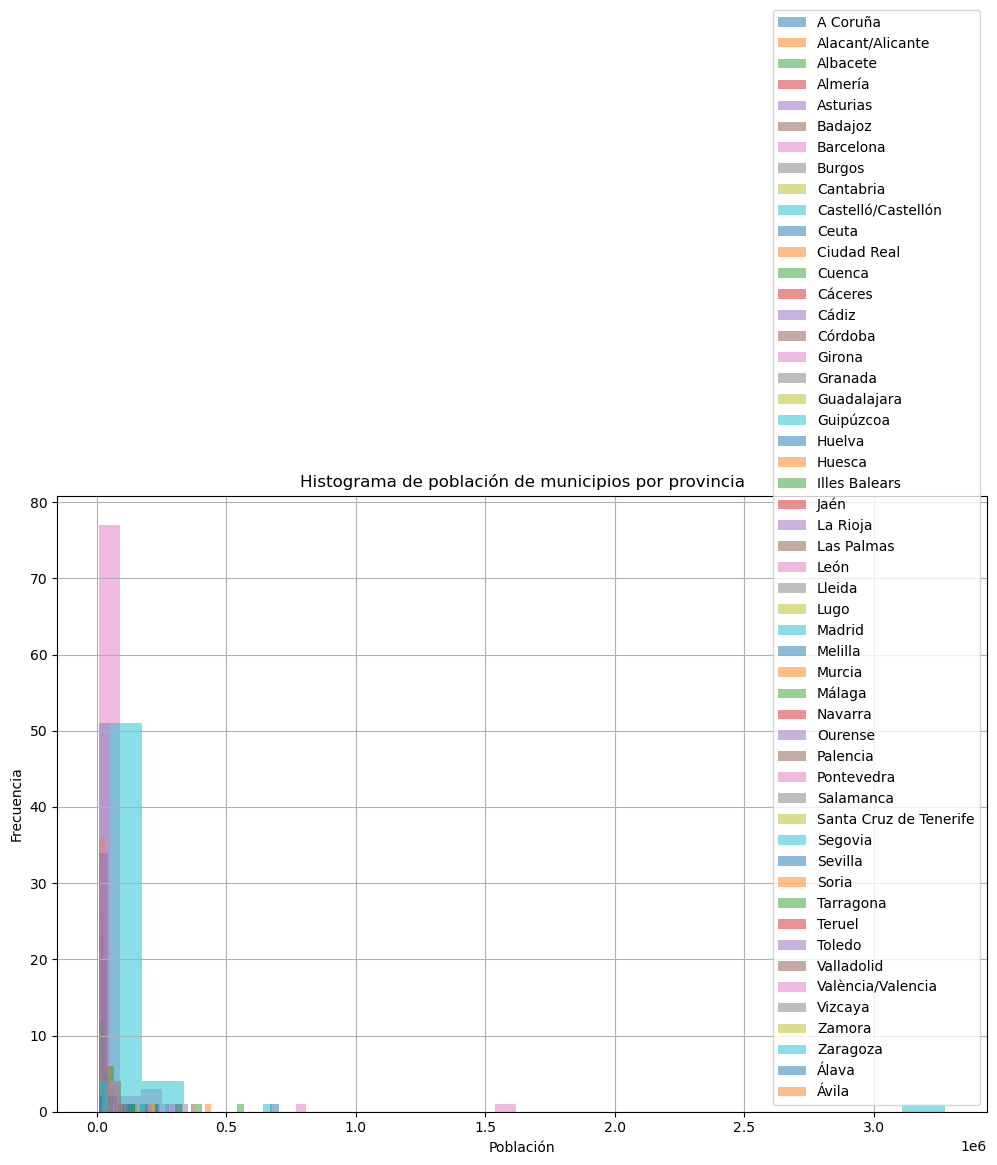

In [44]:
import matplotlib.pyplot as plt

# Crear una figura y ejes para el gráfico
plt.figure(figsize=(12, 8))

# Agrupar los datos por provincia y trazar un histograma para cada una de ellas
for provincia, datos_provincia in df.groupby('Provincia'):
    plt.hist(datos_provincia['Poblacion'], bins=20, alpha=0.5, label=provincia)

# Agregar etiquetas y leyenda
plt.xlabel('Población')
plt.ylabel('Frecuencia')
plt.title('Histograma de población de municipios por provincia')
plt.legend()

# Mostrar el histograma
plt.grid(True)
plt.show()


### 7. Seleccione al azar cincuenta municipios diferentes de entre los diponibles en el archivo. Asegúrese de que no se repitan. ¿Luego calcule el promedio de la población y la desviación estándar de esto 50 municipios?.

In [46]:
import pandas as pd

# Cargar el conjunto de datos en un DataFrame
df = pd.read_csv('nucleospoblacion.csv')

# Seleccionar al azar cincuenta municipios diferentes sin repetición
municipios_aleatorios = df.sample(n=50, replace=False)

# Calcular el promedio y la desviación estándar de la población de estos municipios
promedio_poblacion = municipios_aleatorios['Poblacion'].mean()
desviacion_estandar_poblacion = municipios_aleatorios['Poblacion'].std()

# Imprimir los resultados
print("Promedio de la población de los cincuenta municipios seleccionados:", promedio_poblacion)
print("Desviación estándar de la población de los cincuenta municipios seleccionados:", desviacion_estandar_poblacion)


Promedio de la población de los cincuenta municipios seleccionados: 48118.72
Desviación estándar de la población de los cincuenta municipios seleccionados: 75595.76106084905


### 8. Determine los nombres de los Municipios más cercano y más lejano a Madrid. Para ello debe calcular la distancia en todos ellos y Madrid. No considere a Madrid en el análisis ya que la distancia sería cero.

In [48]:
from math import radians, sin, cos, sqrt, atan2

# Coordenadas de Madrid (latitud y longitud en grados decimales)
madrid = df[df['Municipio'] == 'Madrid'].iloc[0]
lat_madrid = radians(madrid['Y'])
lon_madrid = radians(madrid['X'])

#lat_madrid = radians(40.4168)
#lon_madrid = radians(-3.7038)

# Calcular la distancia entre dos puntos geográficos utilizando la fórmula de Haversine
def calcular_distancia(lat1, lon1, lat2, lon2):
    # Radio de la Tierra en kilómetros
    radio_tierra = 6371.0
    
    # Convertir latitud y longitud de grados a radianes
    latitud1 = radians(lat1)
    longitud1 = radians(lon1)
    latitud2 = radians(lat2)
    longitud2 = radians(lon2)
    
    # Diferencia de latitud y longitud
    dlat = latitud2 - latitud1
    dlon = longitud2 - longitud1
    
    # Fórmula de Haversine
    a = sin(dlat / 2)**2 + cos(latitud1) * cos(latitud2) * sin(dlon / 2)**2
    c = 2 * atan2(sqrt(a), sqrt(1 - a))
    distancia = radio_tierra * c
    
    return distancia

# Calcular la distancia entre Madrid y cada municipio en el DataFrame
df['Distancia_a_Madrid'] = df.apply(lambda row: calcular_distancia(lat_madrid, lon_madrid, row['Y'], row['X']), axis=1)

# Encontrar el municipio más cercano y el más lejano a Madrid
municipio_mas_cercano = df.loc[df['Distancia_a_Madrid'].idxmin()]['Municipio']
municipio_mas_lejano = df.loc[df['Distancia_a_Madrid'].idxmax()]['Municipio']

# Imprimir los resultados
print("Municipio más cercano a Madrid:", municipio_mas_cercano)
print("Municipio más lejano a Madrid:", municipio_mas_lejano)


Municipio más cercano a Madrid: Tuineje
Municipio más lejano a Madrid: Viveiro
